## The data set is taken from kaggle.
https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#### Data present - 400 rows * 9 columns
#### Continuous Valued features/attributes - 'Serial No', 'GRE Score',	'TOEFL Score',	'University Rating', 'SOP',	'LOR',	'CGPA', 'Research',	'Chance of Admit'
#### There are no categorical variables present in the dataset

In [2]:
#Reading the dataset
data = pd.read_csv('Admission_predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
#Finding the info of the dataset for any null values and 
#finding the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.drop(columns=["Serial No."], inplace=True)

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.duplicated().sum()

0

## Visualization and Summary Statistics

#### The data is visualized in a 3*3 grid of subplots using matplotlib, which displays distribution of all the numerical features present in the data.
#### Using seaborn library, visualized the data with a heatmap of correlation matrix to visualize the relationships and patterns between numerical features in the data. 
#### Also created a scatterplot matrix(pariplot) to show the relationship between two numerical features of given data.

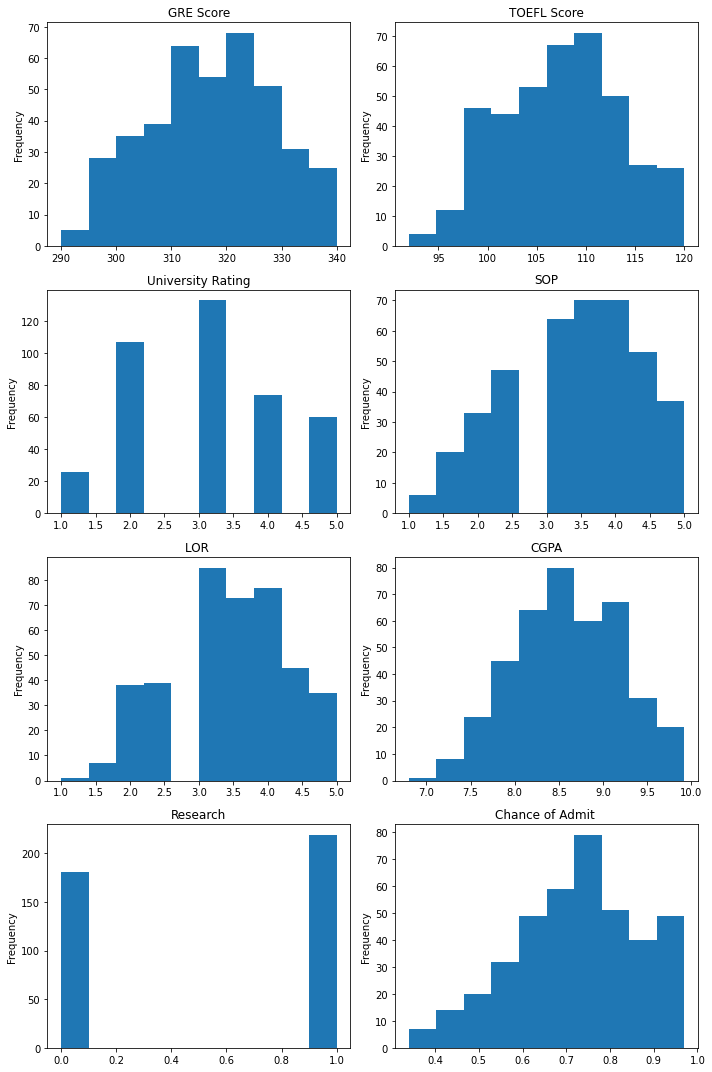

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, axis = plt.subplots(4,2,figsize=(10, 15))
axis = axis.ravel()  # Flatten the 2D array of axes

# Create histograms for each column
for i, column in enumerate(data.columns):
    data[column].plot(kind='hist', ax=axis[i])
    axis[i].set_title(column)

plt.tight_layout()
plt.show()

<AxesSubplot:>

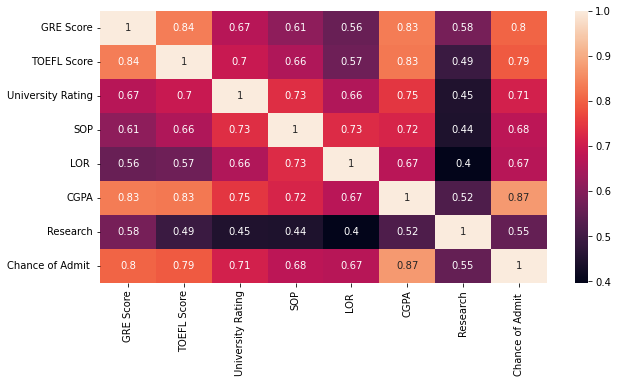

In [11]:
#Plotting the correlation matrix to visualise the data
corr=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True)

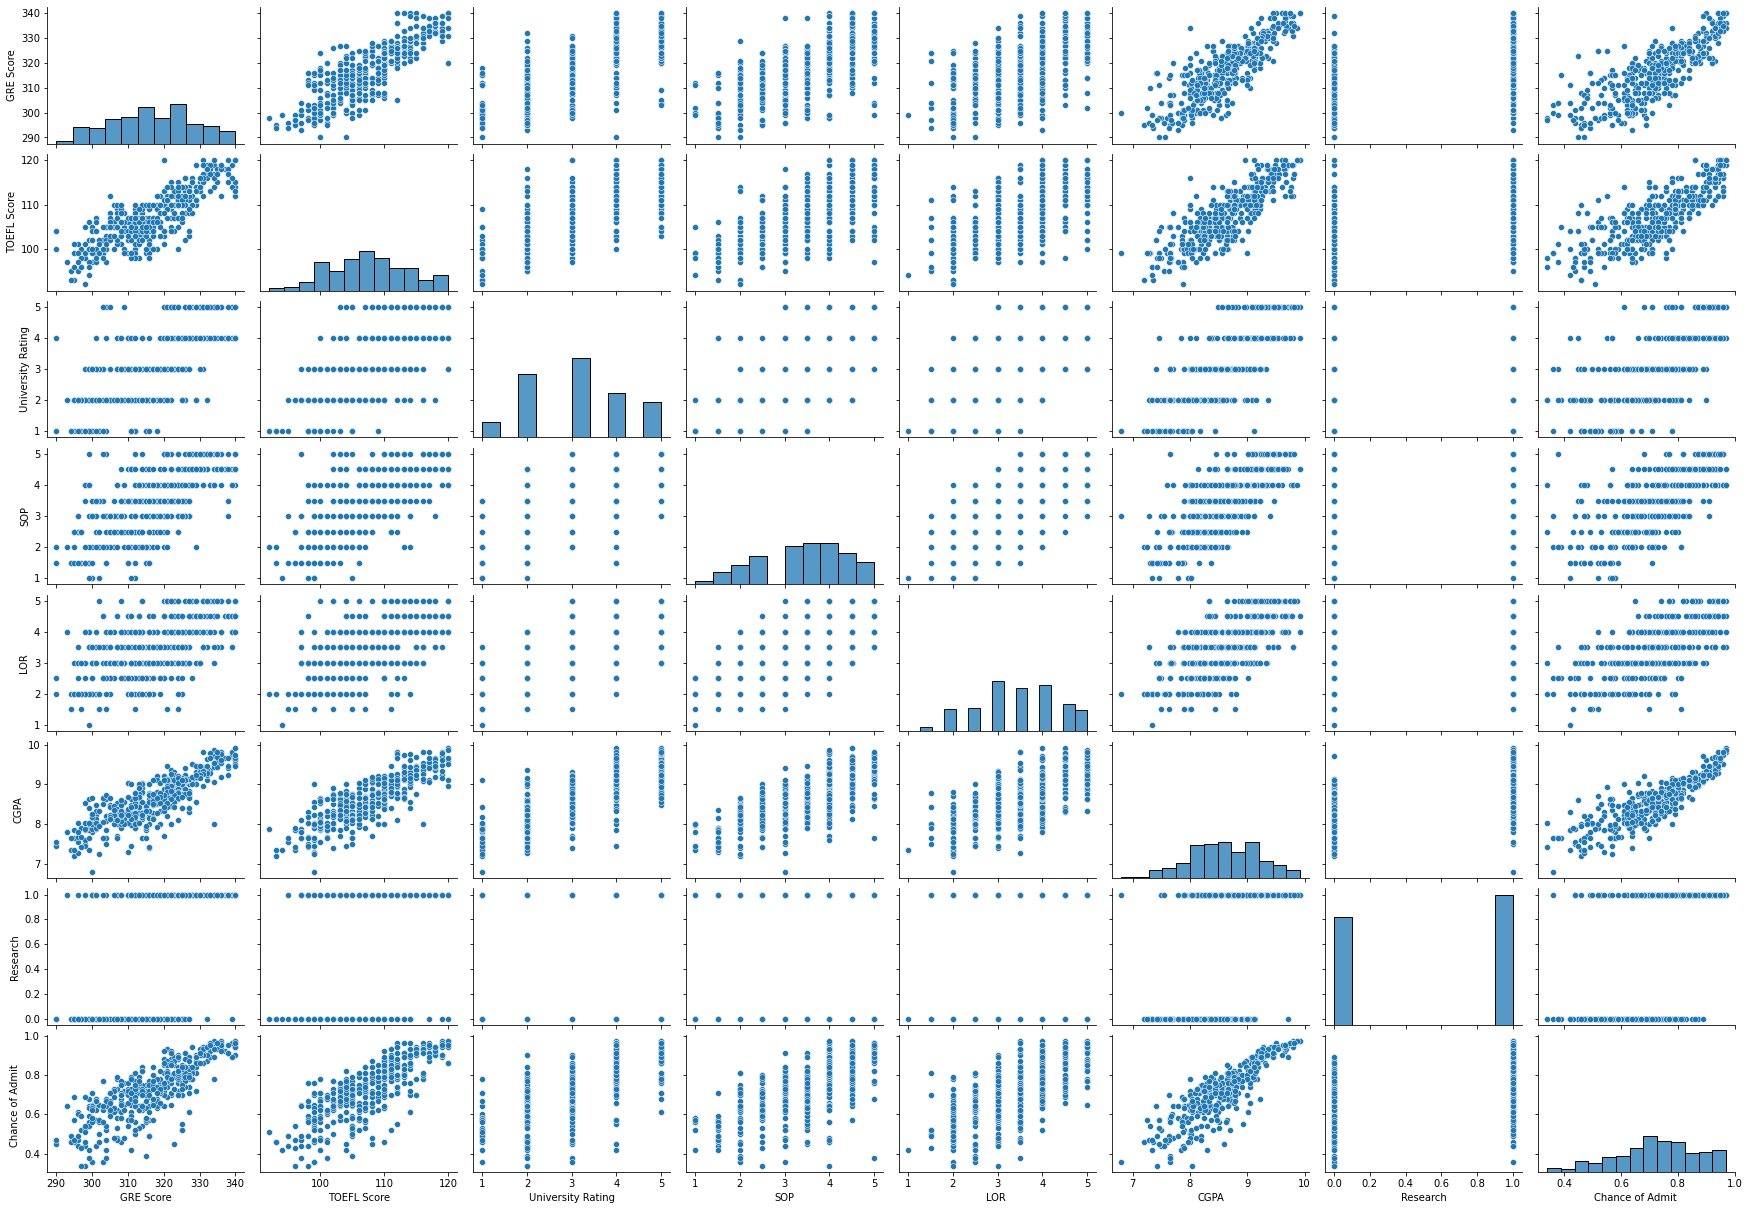

In [12]:
x= sns.pairplot(data)
x.fig.set_size_inches(25,17)

## PCC Table
#### PCC table has been calculated between 'Chance of Admit ' and other features 'University Rating','GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research' and sorted it in descending order by storing all these features in a list and iterating them using a loop to calculate correlation for each feature.

## SCATTER PLOTS
#### Using seaborn library, scatterplot matrix(pairplot) to understand relationships between two features and correlations between different features in the data.

## DISCUSION
#### The highest correlated value with 'CGPA' is Social support and the least is 'Research'

In [13]:
rv = 'Chance of Admit '
f = ['University Rating','GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research' ] #Features effecting chances of admit
corr = {}
for feature in f:
    correlation = data[rv].corr(data[feature])
    corr[feature] = correlation

corr_series = pd.Series(corr)
sc = corr_series.sort_values(ascending=False)
print(sc)

CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
dtype: float64


In [14]:
x=pd.DataFrame(sc)

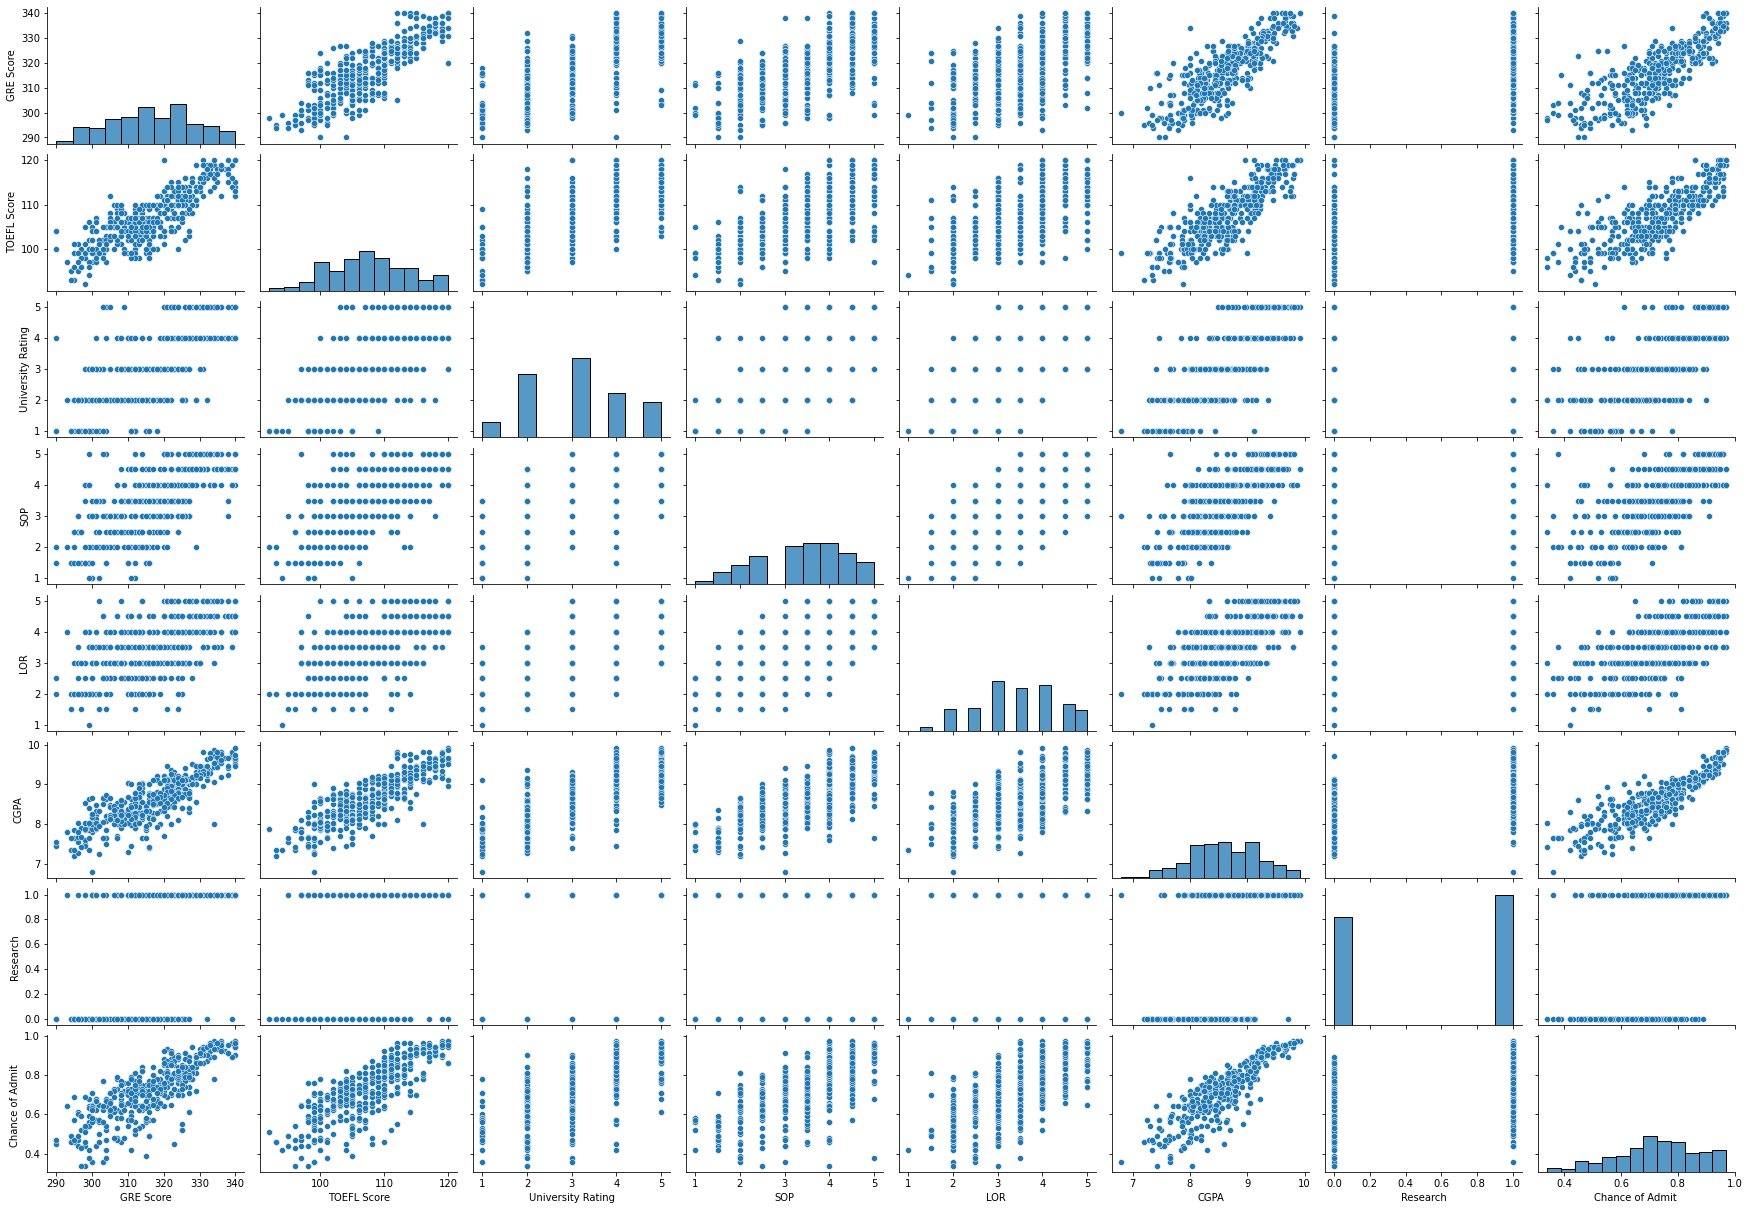

In [15]:
x= sns.pairplot(data)
x.fig.set_size_inches(25,17)

In [16]:
#giving x and y labels
X=data.drop('Chance of Admit ', 1)
y=data['Chance of Admit ']

# X = data.drop(columns=["Chance of Admit "])
# y = data["Chance of Admit "]

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\2436921094.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Chance of Admit ', 1)


## Splitting training and testing data
#### X and y are the feature matrix and target variable, respectively. Using  'test_size=0.2', we divide the data where 20% of the data will be used for testing, and the remaining 80% will be used for training.
#### Using random_state=42 argument sets the random seed for reproducibility. It ensures that the same split is generated each time you run the code.

## Verifying the splitting
#### Using seaborn, we create two histograms where one is for 'Chance of Admit ' in the original dataset vs 'Chance of Admit ' in the training set that is divided. Then we rotate the x-axis labels of second histogram by 90 degrees for understanding better. These histograms will be helful in understanding the training and entire data set division which will be further helpful during feature analysis and data exploration.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
len(X_test)

80

In [19]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [20]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

(array([280., 290., 300., 310., 320., 330., 340., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

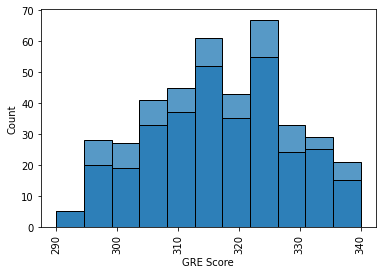

In [21]:
sns.histplot(x = 'GRE Score', data = data)
plt.xticks(rotation = 90)
sns.histplot(x='GRE Score', data = X_train)
plt.xticks(rotation = 90)

## Regression
#### Linear Regression model learns the weights for each feature in the training data which best fits the relationship between the features and the target variable. These coefficients will be used to make predictions on the new, unseen data.
#### Once the fitting of the model is done, the model is trained and ready make predictions using derived relationships between the features and the target variable in the scatter plot with regression line in the red coulour and actual data point with blue colour.
#### 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', error metrics were calculated to evaluate the performance of the regression model.
#### Then performed k-fold cross validation for the regression model by splitting it into 4 folds/subsets and then calculated the error metrics for evaluation of the model.
#### The model is also trained using Stochastic Gradient Descent (SGD) from scikit-learn then trained the model for 1000 epochs and then track all the training and validation losses for each epochs and save them for later use/ analysis.

In [22]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#giving x and y labels
X=data.drop('Chance of Admit ', 1)
y=data['Chance of Admit ']

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\2420397977.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Chance of Admit ', 1)


In [24]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression  #library required for linear reg, and SGD, MSE.
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [25]:
# K Fold

normal_equation_mse = [] #normal_equation_mse
sgd_mse = []
sgd_train_loss = []
sgd_val_loss = []

In [26]:
# Assuming you have your features in X (a DataFrame) and response variable in y (a Series)

# Initialize the KFold cross-validator
kf = KFold(n_splits=4, shuffle=True, random_state=42)  #  To split into 4 equal folds, shuffle means to shuffle data before splitting,You can adjust the random_stat which is random speed of reproducibilitye

In [27]:
# Initialize lists to store evaluation metrics for each fold
# we typically calculate evaluation metrics, such as accuracy, precision, recall, or others, for each fold. These metrics are used to assess the model's performance.
normal_equation_mse = [] # To initialize two empty lists to store Mean Squared Errors (MSE) for each fold of two different linear regression models.
sgd_mse = []


In [28]:
# Loop through the folds
for train_index, test_index in kf.split(X):      #kf.split(X) is to generate indices for train and test set for each iteration.
    # Split the data into training and testing sets for every iteration i.e, 1-test, k-1 - train ans so on.
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [29]:
# After spliting data in k=4 fold method, now we use each iteration to train machine learning model(LM) on training setand then evaluating its performance with respect to test set.
    # Linear Regression using Normal Equation (Closed-form solution)
normal_equation_model = LinearRegression()   # creating a linear reg. model from library.
normal_equation_model.fit(X_train, y_train)  # To train lm model using xtrain, y train. fit meathod in lib which fits model to training data, also learns coefficients that minimize mse between model prediction and actual target values.  
y_pred_normal = normal_equation_model.predict(X_test)# used to predict trained lm with test dataset. predit() takes the test features as input and returns the predicted values for the target variable, and stores the data into 'y_pred_normal'
mse_normal = mean_squared_error(y_test, y_pred_normal) # MSE between the actual target values y_test and the predicted values y_pred_normal.
normal_equation_mse.append(mse_normal) # takes mse alues and stores in list declared above.

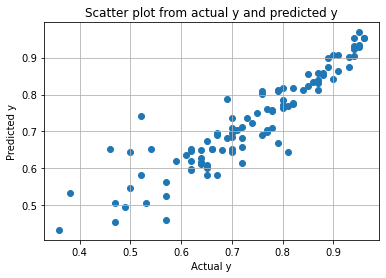

In [30]:
plt.scatter(y_test,y_pred_normal)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [31]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_normal))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_normal))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_normal)))
print('R2 Score: ',r2_score(y_test, y_pred_normal))

Mean Absolute Error: 0.03987146412837589
Mean Squared Error: 0.003282504015226
Root Mean Squared Error: 0.05729314108360616
R2 Score:  0.8359876397425572


In [32]:
X_t = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_t).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     158.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.16e-95
Time:                        16:09:04   Log-Likelihood:                 393.52
No. Observations:                 300   AIC:                            -771.0
Df Residuals:                     292   BIC:                            -741.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1680      0.14

In [33]:
# SGD


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGDRegressor with different hyperparameters
sgd_model = SGDRegressor(max_iter=20, tol=1e-3, learning_rate='constant', eta0=0.01, alpha=0.01, random_state=42)

sgd_train_losses = []
sgd_val_losses = []

# SGD training loop
for epoch in range(20):
    # Training loss
    sgd_model.partial_fit(X_train_scaled, y_train)
    y_pred_train = sgd_model.predict(X_train_scaled)
    train_loss = mean_squared_error(y_train, y_pred_train)
    sgd_train_losses.append(train_loss)

    # Validation loss
    y_pred_val = sgd_model.predict(X_test_scaled)
    val_loss = mean_squared_error(y_test, y_pred_val)
    sgd_val_losses.append(val_loss)

# Calculate R-squared on the validation set
r2 = r2_score(y_test, y_pred_val)
print("R-squared:", r2)


R-squared: 0.8349446558914356


In [34]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_val)))
print('R2 Score: ', r2_score(y_test,y_pred_val))

Mean Absolute Error: 0.039568292462813605
Mean Squared Error: 0.0033033780437062214
Root Mean Squared Error: 0.05747502104137259
R2 Score:  0.8349446558914356


In [35]:
y_pred_val

array([0.80417056, 0.54067433, 0.65112674, 0.63180583, 0.60994792,
       0.68714461, 0.95378513, 0.65521938, 0.84053049, 0.81780304,
       0.75545041, 0.68491117, 0.7140167 , 0.6851239 , 0.65761393,
       0.43231861, 0.64824088, 0.74375307, 0.95699148, 0.63967038,
       0.65524371, 0.65921933, 0.5459029 , 0.8102075 , 0.65844522,
       0.79213769, 0.86141189, 0.93655559, 0.80759845, 0.9533518 ,
       0.87552422, 0.77522996, 0.81851902, 0.66794771, 0.91397403,
       0.6403762 , 0.5558523 , 0.50155015, 0.69237457, 0.68032307,
       0.58139012, 0.81459489, 0.90334548, 0.87801118, 0.86661239,
       0.84478443, 0.8444637 , 0.71068954, 0.52577633, 0.65450726,
       0.97490315, 0.927133  , 0.86623358, 0.8247914 , 0.85497136,
       0.85860447, 0.59710613, 0.80749987, 0.70194436, 0.69516332,
       0.75956263, 0.91392524, 0.72562801, 0.74205145, 0.71811298,
       0.65183499, 0.56549261, 0.90494698, 0.69634051, 0.78691249,
       0.62449009, 0.64660239, 0.59567927, 0.73570233, 0.81027

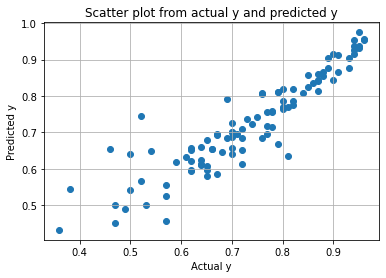

In [36]:
plt.scatter(y_test,y_pred_val)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [37]:
X_t = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_t).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     158.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.16e-95
Time:                        16:09:04   Log-Likelihood:                 393.52
No. Observations:                 300   AIC:                            -771.0
Df Residuals:                     292   BIC:                            -741.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1680      0.14

In [38]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42)
sgd_train_losses = []
sgd_val_losses = []
    
    # SGD training loop
for epoch in range(1000):
        # Training loss
    sgd_model.partial_fit(X_train, y_train)
    y_pred_train = sgd_model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_pred_train)
    sgd_train_losses.append(train_loss)
        
        # Validation loss
    y_pred_val = sgd_model.predict(X_test)
    val_loss = mean_squared_error(y_test, y_pred_val)
    sgd_val_losses.append(val_loss)
    
sgd_mse.append(val_loss)
sgd_train_loss.append(sgd_train_losses)
sgd_val_loss.append(sgd_val_losses)

In [39]:
# Calculate the average MSE across all folds for both models
average_normal_mse = np.mean(normal_equation_mse)
average_sgd_mse = np.mean(sgd_mse)
print("Average Normal Equation MSE:", average_normal_mse)
print("Average SGD MSE:", average_sgd_mse)

Average Normal Equation MSE: 0.003282504015226
Average SGD MSE: 2.5570115647400237e+29


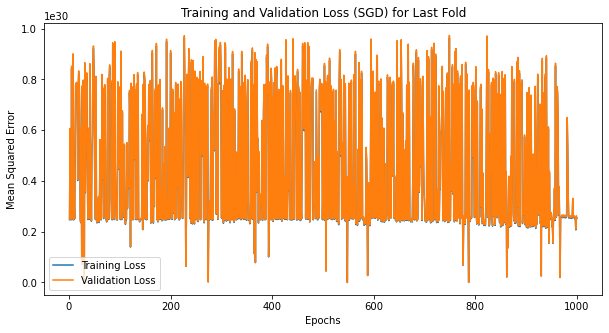

In [40]:
# Plot training and validation loss for the last fold during SGD training
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), sgd_train_loss[-1], label='Training Loss')
plt.plot(range(1, 1001), sgd_val_loss[-1], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss (SGD) for Last Fold')
plt.legend()
plt.show()

### Regularization
#### Performed Ridge, Lasso, ElasticNet regressions with different regularization(aplha) values and then calculate the mean squared error for every combination of the alpha value with the model and then prints the average MSE values for every regression that helps to access the performance of regularizations with various levels of them.

In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_mse = []
lasso_mse = []
elasticnet_mse = []
ridge_r2 = []
lasso_r2 = []
elasticnet_r2 = []


# Ridge Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    ridge_r2.append(r2_ridge)
    ridge_mse.append(mse_ridge)


# Lasso Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_ridge)
    lasso_r2.append(r2_lasso)
    lasso_mse.append(mse_lasso)

# Elastic Net Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # You can adjust the l1_ratio as needed
    elasticnet_model.fit(X_train, y_train)
    y_pred_elasticnet = elasticnet_model.predict(X_test)
    mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
    r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
    elasticnet_r2.append(r2_elasticnet)
    elasticnet_mse.append(mse_elasticnet)
    
    
average_ridge_mse = np.mean(ridge_mse)
average_lasso_mse = np.mean(lasso_mse)
average_elasticnet_mse = np.mean(elasticnet_mse)
average_ridge_r2 = np.mean(ridge_r2)
average_lasso_r2 = np.mean(lasso_r2)
average_elasticnet_r2 = np.mean(elasticnet_r2)

print("Average Ridge MSE for different alpha values:", ridge_mse)
print("Average Lasso MSE for different alpha values:", lasso_mse)
print("Average Elastic Net MSE for different alpha values:", elasticnet_mse)
print("Average Ridge R2 for different alpha values:", ridge_r2)
print("Average Lasso R2 for different alpha values:", lasso_r2)
print("Average Elastic Net R2 for different alpha values:", elasticnet_r2)

Average Ridge MSE for different alpha values: [0.0032825014094716425, 0.003282521096072262, 0.003286527386670041, 0.003473957485034959]
Average Lasso MSE for different alpha values: [0.0052591432331974865, 0.006525227469310891, 0.014766689951274678, 0.020152999999999997]
Average Elastic Net MSE for different alpha values: [0.0038050892218848835, 0.006461078548857634, 0.009204882028849639, 0.020152999999999997]
Average Ridge R2 for different alpha values: [0.8359877699406987, 0.8359867862874212, 0.8357866094791763, 0.8264215477234184]
Average Lasso R2 for different alpha values: [0.8264215477234184, 0.8264215477234184, 0.8264215477234184, 0.8264215477234184]
Average Elastic Net R2 for different alpha values: [0.8098763439810969, 0.6771681808486945, 0.5400723287953069, -0.006957213437155163]


#### We systematically explore various combinations of batch sizes and learning rates, train and evaluate an SGDRegressor model for each combination using k-fold cross-validation, and print the average training and validation losses. This helps in selecting the best hyperparameters for the model based on the lowest validation loss.

#### Description of Models:

#### 1. Linear Regression using Normal Equation (Closed-form solution) : normal_equation_model = LinearRegression(). The linear regression model uses the normal equation to find the optimal coefficients for a linear equation that best fits the data. It's a closed-form solution, it directly computes the coefficients without the need for iterative optimization. The Mean Squared Error is calculated for this model on a test dataset.

####  2. Linear Regression using Stochastic Gradient Descent : sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42). The linear regression model uses the stochastic gradient descent algorithm to iteratively update its coefficients to minimize the MSE. It updates the model parameters in small steps (stochastic updates) rather than computing them all at once. The code trains this model for 1000 epochs, and the training and validation losses are tracked over time. The final MSE is also calculated and stored.

#### 3. Ridge Regression : ridge_model = Ridge(alpha=alpha). Ridge regression is a linear regression model with L2 regularization. It adds a penalty term to the linear regression cost function, which helps prevent overfitting by shrinking the coefficients toward zero. The alpha parameter controls the strength of regularization. The code trains Ridge regression models with different alpha values and calculates the MSE for each. The results are stored in mse_ridge.

#### 4. Lasso Regression : lasso_model = Lasso(alpha=alpha). Lasso regression is a linear regression model with L1 regularization. It also adds a penalty term to the cost function but has a tendency to set some of the coefficients exactly to zero, effectively performing feature selection. The alpha parameter controls the strength of regularization. Similar to Ridge, Lasso models with different alpha values are trained, and the MSE is calculated for each. The results are stored in mse_lasso.

#### 5. Elastic Net Regression : elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5). Elastic Net regression combines L1 (Lasso) and L2 (Ridge) regularization. It provides a balance between the two types of regularization and can be useful when there are many features with potential multicollinearity. Like Ridge and Lasso, Elastic Net models with different alpha values are trained, and the MSE is calculated for each. The results are stored in mse_elasticnet.

#### 6. Stochastic Gradient Descent (SGD) Regression with Hyperparameter Search : sgd_model = SGDRegressor(...). This performs a grid search for hyperparameter tuning of an SGDRegressor model. It iterates over different combinations of batch sizes and learning rates to find the best hyperparameters that minimize the validation loss. The code trains the SGDRegressor model with various hyperparameters and prints the average training and validation losses for each combination. This helps in selecting the best hyperparameters for the model based on the lowest validation loss.

In [42]:
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Create an SGD model with the specified batch size and learning rate
        sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=learning_rate, random_state=42)
        
        # Initialize lists to track training and validation losses
        sgd_train_losses = []
        sgd_val_losses = []

        # Cross-validation loop
        for train_index, test_index in kf.split(X):
            # Split the data into training and testing sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Fit the SGD model to the training data
            for epoch in range(1000):  # You can adjust the number of epochs
                sgd_model.partial_fit(X_train, y_train)
                
                # Calculate training loss
                y_pred_train = sgd_model.predict(X_train)
                train_loss = mean_squared_error(y_train, y_pred_train)
                sgd_train_losses.append(train_loss)
                
                # Calculate validation loss
                y_pred_val = sgd_model.predict(X_test)
                val_loss = mean_squared_error(y_test, y_pred_val)
                sgd_val_losses.append(val_loss)

        # Calculate and store metrics like MSE for each combination
        average_train_loss = np.mean(sgd_train_losses)
        average_val_loss = np.mean(sgd_val_losses)
        
        # Print or store the hyperparameters and their corresponding metrics
        print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}")
        print(f"Average Training Loss: {average_train_loss}")
        print(f"Average Validation Loss: {average_val_loss}")

Batch Size: 32, Learning Rate: 0.001
Average Training Loss: 5.663505197022133e+27
Average Validation Loss: 5.655316843683529e+27
Batch Size: 32, Learning Rate: 0.01
Average Training Loss: 6.27139346536362e+29
Average Validation Loss: 6.257979838882707e+29
Batch Size: 32, Learning Rate: 0.1
Average Training Loss: 5.77747523463428e+31
Average Validation Loss: 5.7586715418811615e+31
Batch Size: 64, Learning Rate: 0.001
Average Training Loss: 5.663505197022133e+27
Average Validation Loss: 5.655316843683529e+27
Batch Size: 64, Learning Rate: 0.01
Average Training Loss: 6.27139346536362e+29
Average Validation Loss: 6.257979838882707e+29
Batch Size: 64, Learning Rate: 0.1
Average Training Loss: 5.77747523463428e+31
Average Validation Loss: 5.7586715418811615e+31
Batch Size: 128, Learning Rate: 0.001
Average Training Loss: 5.663505197022133e+27
Average Validation Loss: 5.655316843683529e+27
Batch Size: 128, Learning Rate: 0.01
Average Training Loss: 6.27139346536362e+29
Average Validation Loss

#### Polynomial regression is an extension of linear regression that can capture nonlinear relationships between features and the target variable by introducing polynomial terms. In polynomial regression, the relationship between the independent variable (feature) and the dependent variable (target) is modeled as an nth-degree polynomial.

#### The code performs polynomial regression with a specified degree using both the Normal Equation and SGD approaches. It evaluates the models using KFold cross-validation and tracks MSE for each fold and each model. The results are averaged, and we can visualize the training and validation loss for the SGD model. We assess how well polynomial regression models fit the data and compare the two different training methods.

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [44]:
normal_equation_msep = [] #normal_equation_mse
sgd_msep = []
sgd_train_lossp = []
sgd_val_lossp = []

In [45]:

#giving x and y labels
Xp=data.drop('Chance of Admit ', 1)
yp=data['Chance of Admit ']

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\839402335.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xp=data.drop('Chance of Admit ', 1)


Average Normal Equation MSE (Polynomial): 8.797409495333678
Average SGD MSE (Polynomial): 2.791358090307817e+28


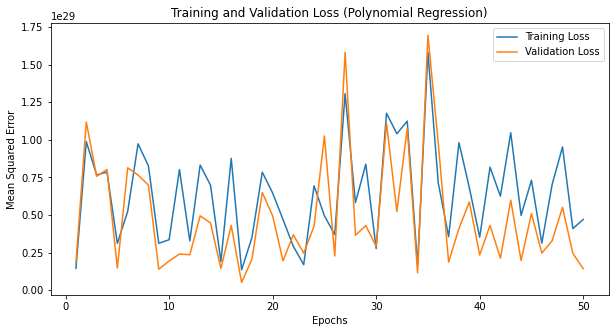

In [46]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the KFold cross-validator
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
normal_equation_msep = []  # For Normal Equation Polynomial Regression
sgd_msep = []              # For SGD Polynomial Regression
sgd_train_lossp = []       # Training loss for SGD Polynomial Regression
sgd_val_lossp = []         # Validation loss for SGD Polynomial Regression

# Polynomial degree
degree = 4

# Loop through the folds
for train_index, test_index in kf.split(Xp):  # Assuming you have Xp and yp
    X_train, X_test = Xp.iloc[train_index], Xp.iloc[test_index]
    y_train, y_test = yp.iloc[train_index], yp.iloc[test_index]

    # Data Preprocessing
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Linear Regression using Normal Equation
    normal_equation_model = LinearRegression()
    normal_equation_model.fit(X_train_poly, y_train)
    y_pred_normal = normal_equation_model.predict(X_test_poly)
    mse_normal = mean_squared_error(y_test, y_pred_normal)
    normal_equation_msep.append(mse_normal)

    # Linear Regression using SGD with Regularization
    sgd_model = SGDRegressor(
        max_iter=50, tol=1e-3, learning_rate='constant', eta0=0.1, random_state=42, penalty='l2', alpha=0.001
    )

    sgd_train_losses = []
    sgd_val_losses = []

    for epoch in range(50):
        sgd_model.partial_fit(X_train_poly, y_train)
        y_pred_train = sgd_model.predict(X_train_poly)
        train_loss = mean_squared_error(y_train, y_pred_train)
        sgd_train_losses.append(train_loss)

        y_pred_val = sgd_model.predict(X_test_poly)
        val_loss = mean_squared_error(y_test, y_pred_val)
        sgd_val_losses.append(val_loss)

    sgd_msep.append(val_loss)
    sgd_train_lossp.append(sgd_train_losses)
    sgd_val_lossp.append(sgd_val_losses)

# Calculate the average MSE across all folds for both models
average_normal_mse = np.mean(normal_equation_msep)
average_sgd_mse = np.mean(sgd_msep)
print("Average Normal Equation MSE (Polynomial):", average_normal_mse)
print("Average SGD MSE (Polynomial):", average_sgd_mse)

# Plot training and validation loss for the last fold during SGD training
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), sgd_train_lossp[-1], label='Training Loss')
plt.plot(range(1, 51), sgd_val_lossp[-1], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss (Polynomial Regression)')
plt.legend()
plt.show()


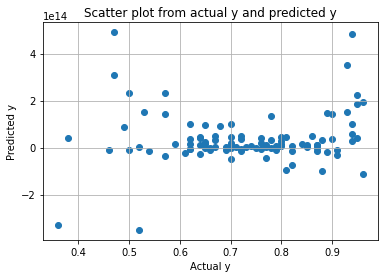

In [47]:
plt.scatter(y_test,y_pred_val)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_val)))

Mean Absolute Error: 66412334800310.15
Mean Squared Error: 1.422105036599043e+28
Root Mean Squared Error: 119252045542164.31


#### The code performs a systematic hyperparameter search for Ridge, Lasso, and Elastic Net regularization on a polynomial regression model. It evaluates the models with different alpha values, calculates their MSE on the test data, and reports the average MSE for each regularization technique. This analysis helps in selecting the optimal regularization strength for each regression method, allowing us to strike the right balance between bias and variance in the polynomial regression model.

In [49]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_mse = []
lasso_mse = []
elasticnet_mse = []
ridge_r2 = []
lasso_r2 = []
elasticnet_r2 = []


# Ridge Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    ridge_r2.append(r2_ridge)
    ridge_mse.append(mse_ridge)


# Lasso Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_ridge)
    lasso_r2.append(r2_lasso)
    lasso_mse.append(mse_lasso)

# Elastic Net Regression
alpha_values = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
for alpha in alpha_values:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # You can adjust the l1_ratio as needed
    elasticnet_model.fit(X_train, y_train)
    y_pred_elasticnet = elasticnet_model.predict(X_test)
    mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
    r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
    elasticnet_r2.append(r2_elasticnet)
    elasticnet_mse.append(mse_elasticnet)
    
    
average_ridge_mse = np.mean(ridge_mse)
average_lasso_mse = np.mean(lasso_mse)
average_elasticnet_mse = np.mean(elasticnet_mse)
average_ridge_r2 = np.mean(ridge_r2)
average_lasso_r2 = np.mean(lasso_r2)
average_elasticnet_r2 = np.mean(elasticnet_r2)

print("Average Ridge MSE for different alpha values:", ridge_mse)
print("Average Lasso MSE for different alpha values:", lasso_mse)
print("Average Elastic Net MSE for different alpha values:", elasticnet_mse)
print("Average Ridge R2 for different alpha values:", ridge_r2)
print("Average Lasso R2 for different alpha values:", lasso_r2)
print("Average Elastic Net R2 for different alpha values:", elasticnet_r2)

Average Ridge MSE for different alpha values: [0.003282504485888351, 0.0032825126171111686, 0.003282961499483525, 0.0033112975386427306]
Average Lasso MSE for different alpha values: [0.003436508731239928, 0.014485913130908296, 0.020152999999999997, 0.020152999999999997]
Average Elastic Net MSE for different alpha values: [0.0033258538039443843, 0.00674517460468373, 0.020152999999999997, 0.020152999999999997]
Average Ridge R2 for different alpha values: [0.8359876162256192, 0.8359872099440001, 0.8359647812563193, 0.8345489533879326]
Average Lasso R2 for different alpha values: [0.8345489533879326, 0.8345489533879326, 0.8345489533879326, 0.8345489533879326]
Average Elastic Net R2 for different alpha values: [0.8338216405141071, 0.6629731442425746, -0.006957213437155163, -0.006957213437155163]


#### This performs grid search for hyperparameter tuning by including polynomial feature transformation. We explore how different combinations of batch size, learning rate, and polynomial degrees affect the performance of the SGDRegressor model using k-fold cross-validation, and print the average training and validation losses.. The evaluation metric is the Mean Squared Error (MSE), and so we can find the combination of hyperparameters that minimizes the MSE on the validation data.

#### Description of Models:

#### 1. Polynomial Regression using Normal Equation (Closed-form solution) : normal_equation_model = LinearRegression(). In polynomial regression, the model is still a linear regression model, but the features are transformed by adding polynomial terms. The model can then be trained using the normal equation with these polynomial features. The model uses the normal equation to find the optimal coefficients for equation that best fits the data. It's a closed-form solution, it directly computes the coefficients without the need for iterative optimization.The Mean Squared Error is calculated for this model on a test dataset.

#### 2. Polynomial Regression using Stochastic Gradient Descent (SGD) : sgd_model =SGDRegressor(max_iter=50, tol=1e-3, learning_rate='constant', eta0=0.1, random_state=42). This model can be adapted for polynomial regression by using the transformed polynomial features as inputs. The SGD algorithm will learn the optimal coefficients for the polynomial terms. The code trains this model with polynomial features and tracks training and validation losses. The final MSE is calculated and stored.

#### 3. Polynomial Ridge Regression : ridge_model = Ridge(alpha=alpha). Polynomial Ridge regression extends ridge regression to include polynomial features. It applies L2 regularization to the polynomial coefficients, helping prevent overfitting of the polynomial terms. The code trains Ridge regression models with polynomial features and different alpha values. It calculates the MSE for each and stores the results.

#### 4. Polynomial Lasso Regression : lasso_model = Lasso(alpha=alpha). Polynomial Lasso regression extends Lasso regression to include polynomial features. It applies L1 regularization to the polynomial coefficients, leading to feature selection in the context of polynomial terms. The code trains Lasso models with polynomial features and different alpha values, calculating the MSE for each and storing the results.

#### 5. Polynomial Elastic Net Regression : elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5). Polynomial Elastic Net regression combines L1 and L2 regularization for polynomial features. It balances feature selection (L1) and coefficient shrinkage (L2) while handling polynomial terms. Elastic Net models with polynomial features and different alpha values are trained, and the MSE is calculated for each, with the results stored.

#### 6. Polynomial Stochastic Gradient Descent (SGD) Regression with Hyperparameter Search : sgd_model = SGDRegressor(...). This performs a grid search for hyperparameter tuning of an SGDRegressor model with polynomial features. It iterates over different combinations of batch sizes and learning rates while using polynomial features to find the best hyperparameters that minimize the validation loss. The code trains the SGDRegressor model with polynomial features and various hyperparameters. It prints the average training and validation losses for each combination to identify the best hyperparameters for polynomial regression based on the lowest validation loss.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Define batch sizes and learning rates
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
degrees = [1, 2]  # Polynomial degrees to experiment with

# Initialize lists to store results
results = []

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for degree in degrees:
            # Initialize lists to track training and validation losses
            sgd_train_losses = []
            sgd_val_losses = []

            kf = KFold(n_splits=5, random_state=42, shuffle=True)

            # Cross-validation loop
            for train_index, test_index in kf.split(X):
                # Split the data into training and testing sets for this fold
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Feature scaling
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Polynomial features
                poly = PolynomialFeatures(degree=degree)
                X_train_poly = poly.fit_transform(X_train_scaled)
                X_test_poly = poly.transform(X_test_scaled)

                # Initialize SGDRegressor with specified parameters
                sgd_model = SGDRegressor(
                    max_iter=50, tol=1e-3, learning_rate='constant',
                    eta0=learning_rate, random_state=42
                )

                # SGD training loop
                for epoch in range(50):
                    sgd_model.partial_fit(X_train_poly, y_train)
                    y_pred_train = sgd_model.predict(X_train_poly)
                    train_loss = mean_squared_error(y_train, y_pred_train)
                    sgd_train_losses.append(train_loss)
                    y_pred_val = sgd_model.predict(X_test_poly)
                    val_loss = mean_squared_error(y_test, y_pred_val)
                    sgd_val_losses.append(val_loss)

            # Calculate R-squared on the validation set
            r2 = r2_score(y_test, y_pred_val)

            # Calculate and store metrics like MSE for each combination
            average_train_loss = np.mean(sgd_train_losses)
            average_val_loss = np.mean(sgd_val_losses)

            # Print or store the hyperparameters and their corresponding metrics
            results.append({
                "Batch Size": batch_size,
                "Learning Rate": learning_rate,
                "Polynomial Degree": degree,
                "Average Training Loss": average_train_loss,
                "Average Validation Loss": average_val_loss,
                "R-squared": r2
            })

# Find the best hyperparameters based on R-squared score
best_result = max(results, key=lambda x: x["R-squared"])

# Print or use the best hyperparameters and their corresponding metrics
print(f"Batch Size: {best_result['Batch Size']}")
print(f"Learning Rate: {best_result['Learning Rate']}")
print(f"Polynomial Degree: {best_result['Polynomial Degree']}")
print(f"Average Training Loss: {best_result['Average Training Loss']}")
print(f"Average Validation Loss: {best_result['Average Validation Loss']}")
print(f"R-squared: {best_result['R-squared']}")


Batch Size: 32
Learning Rate: 0.001
Polynomial Degree: 1
Average Training Loss: 0.00808813321980885
Average Validation Loss: 0.00821828377982426
R-squared: 0.871687399172641


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_val)))

Mean Absolute Error: 3117631041385.698
Mean Squared Error: 2.0102101774753125e+25
Root Mean Squared Error: 4483536748455.746


In [52]:
X_t = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_t).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     162.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          5.24e-100
Time:                        16:14:03   Log-Likelihood:                 415.24
No. Observations:                 320   AIC:                            -814.5
Df Residuals:                     312   BIC:                            -784.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1736      0.14

## Prediction on Test Labels

In [53]:
# Predicting test labels (Life Ladder)

y_pred_normal

array([ 4.89349336e-01,  5.97082720e-01, -3.83931354e+00,  2.58318335e+00,
        6.43722847e+00, -4.45793473e+00,  2.99399469e-01, -5.90299812e+00,
        1.03642806e+00,  1.60405911e+00,  1.70393024e+00,  7.53946072e+00,
        1.09840559e+01,  8.94412712e+00,  1.94139680e+00, -8.44772976e+00,
        7.91655023e-01,  3.03629884e-01, -2.33205763e+00,  1.33950967e+00,
        1.45840363e+00,  6.07567696e-01, -7.41256171e+00,  4.19584906e-01,
        1.01746817e+00,  1.14259274e+00,  8.39857375e-01,  1.37946268e+00,
        7.62586275e-01, -3.37514262e-02,  8.74444205e-01,  1.91556148e-01,
       -5.62057572e-01,  4.83813649e-01,  8.33328794e-01, -4.51585367e-02,
       -2.79811359e-01,  3.95189158e-01,  2.26433973e-01,  1.72616177e-01,
        6.94599529e-01,  7.85642719e-01,  1.43191029e+00,  8.81853137e-01,
        9.97312854e-01,  8.24097761e-01,  1.35136514e+00, -1.99240634e+00,
        1.03314144e+00, -5.72563470e-02,  7.37879538e-01,  1.20570858e+00,
        9.70972856e-01,  

## Linear Regression K -Fold : 

#### Mean Absolute Error: 0.03987146412837589
#### Mean Squared Error: 0.003282504015226
#### Root Mean Squared Error: 0.05729314108360616
#### R2 Score:  0.8359876397425572


## Linear Regression SGD :

#### Mean Absolute Error: 0.039568292462813605
#### Mean Squared Error: 0.0033033780437062214
#### Root Mean Squared Error: 0.05747502104137259
#### R2 Score:  0.8349446558914356

## Regularization

#### Ridge MSE : 0.003282504485888351
#### Lasso MSE : 0.003436508731239928
#### Elastic Net MSE: 0.0033258538039443843
#### Ridge R2 : 0.8359876162256192
#### Lasso R2 : 0.8345489533879326
#### Elastic Net : 0.8338216405141071

## Hyper Parameters(Linear Regression):

#### Batch Size: 32
#### Learning Rate: 0.001
#### Average Training Loss: 5.663505197022133e+27
#### Average Validation Loss: 5.655316843683529e+27

## Polynomial Regression : 

#### Mean Absolute Error: 66412334800310.15
#### Mean Squared Error: 1.422105036599043e+28
#### Root Mean Squared Error: 119252045542164.31
#### R-squared: 0.871687399172641

## Hyper Parameters(Polynomial):

#### Batch Size: 32
#### Learning Rate: 0.001
#### Polynomial Degree: 1
#### Average Training Loss: 0.00808813321980885
#### Average Validation Loss: 0.00821828377982426
#### R-squared: 0.871687399172641

# SUMMARY

#### From linear reg, summary stastics,
#### •Coefficients indicate CGPA and GRE Score have more effect on chance of admit of people.
#### •All the std.error are low [0.001,0.148] so the model will be statistically significant.
#### •University Rating, SOP, GRE Score, have high P>|t| value so, should preprocess the column would result in better model.

#### For polynomial degree 2,  
#### •Coefficients indicate CGPA and GRE Score have more effect on chance of admit of people are similar.
#### •For, Perceptions of corruption P>|t|, is significantly high compared to linear model. Whereas for LOR  has reduced.

#### Finally, R-squared and Adjusted R-squared values are same for both models which is 0.87. So the variance of 87% of response variable can be explained by features.

# FUTURE WORK

#### 1) Since, the rows are 400 the model would have been performed still more better if the rows are more (above 5k).
#### 2)  Ensemble methods like bagging (e.g., Random Forest) or boosting (e.g., Gradient Boosting) to combine multiple models can be used to potentially improve predictive performance of the model.